1. Import libraries

In [1]:
# For data 
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plot grid on a white background
sns.set_style("whitegrid")

from datetime import date
from datetime import datetime

2. Import data

In [2]:
# set working directory/file path
df_file_path = "/Users/rebeccab/1-erdos/group_project/weather_tuanan_2003-Apr2020.csv"

# read in the data and store in a dataframe
borneo_rain = pd.read_csv(df_file_path)

3. Copy dataframe and add rain tomorrow column

In [3]:
borneo_rain_copy = borneo_rain.copy()

borneo_rain_copy['rain_tomorrow'] = '0'

for i in borneo_rain_copy.index:
    if i < len(borneo_rain_copy.index)-1:
        if borneo_rain_copy.total_rain_camp[i+1] == '0':
            borneo_rain_copy.rain_tomorrow[i] = '0'
        elif borneo_rain_copy.total_rain_camp[i+1] == 'no data':
            borneo_rain_copy.rain_tomorrow[i] = 'no data'
        else:
            borneo_rain_copy.rain_tomorrow[i] = '1'

<ipython-input-3-ad395d209dc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borneo_rain_copy.rain_tomorrow[i] = '0'
<ipython-input-3-ad395d209dc0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borneo_rain_copy.rain_tomorrow[i] = '1'
<ipython-input-3-ad395d209dc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borneo_rain_copy.rain_tomorrow[i] = 'no data'


In [4]:
# drop missing data
df1 = borneo_rain_copy.drop(borneo_rain_copy.loc[borneo_rain_copy.total_rain_camp == 'no data'].index)
df2 = df1.drop(df1.loc[df1.total_rain_post == 'no data'].index)
df3 = df2.drop(df2.loc[df2.min_temp == 'no data'].index)
df4 = df3.drop(df3.loc[df3.max_temp == 'no data'].index)
df5 = df4.drop(df4.loc[df4.thunder == 'no data'].index)
df6 = df5.drop(df5.loc[df5.smoke == 'no data'].index)
borneo_full_clean = df6.drop(df6.loc[df6.rain_tomorrow == 'no data'].index)

In [5]:
# convert data types
borneo_full_clean['total_rain_camp'] = pd.to_numeric(borneo_full_clean['total_rain_camp'], downcast="float")
borneo_full_clean['total_rain_post'] = pd.to_numeric(borneo_full_clean['total_rain_post'], downcast="float")
borneo_full_clean['min_temp'] = pd.to_numeric(borneo_full_clean['min_temp'], downcast="float")
borneo_full_clean['max_temp'] = pd.to_numeric(borneo_full_clean['max_temp'], downcast="float")
borneo_full_clean['Thunder'] = 0
borneo_full_clean.Thunder.loc[borneo_full_clean['thunder'] == 'present'] = 1 
borneo_full_clean['Smoke'] = 0
borneo_full_clean.Smoke.loc[borneo_full_clean['smoke'] == 'present'] = 1

/Users/rebeccab/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
# split predictor and target variables
X = borneo_full_clean[['year', 'month','day', 'total_rain_camp',
       'total_rain_post', 'min_temp', 'max_temp','Thunder', 'Smoke']]

y = borneo_full_clean['rain_tomorrow']

4. Plot histograms

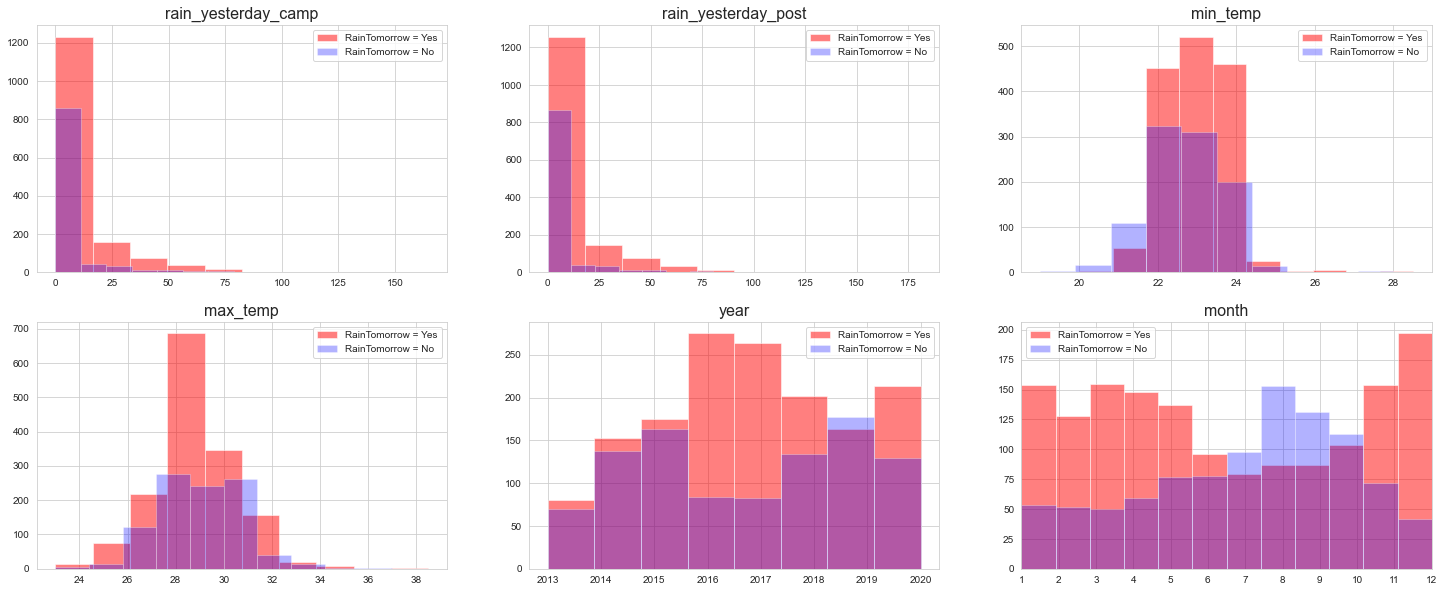

In [7]:
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plot grid on a white background
sns.set_style("whitegrid")

fig, axes = plt.subplots(2,3, figsize=(25,10))
ax = axes.ravel()

plt.subplot(2,3,1)
plt.hist(X.total_rain_camp[y == '1'], color = "red", alpha = .5)
plt.hist(X.total_rain_camp[y == '0'], color = "blue", alpha = .3)
plt.title('rain_yesterday_camp', size = 16)
plt.legend(['RainTomorrow = Yes', 'RainTomorrow = No'], loc = 'best')

plt.subplot(2,3,2)
plt.hist(X.total_rain_post[y == '1'], color = "red", alpha = .5)
plt.hist(X.total_rain_post[y == '0'], color = "blue", alpha = .3)
plt.title('rain_yesterday_post', size = 16)
plt.legend(['RainTomorrow = Yes', 'RainTomorrow = No'], loc = 'best')

plt.subplot(2,3,3)
plt.hist(X.min_temp[y == '1'], color = "red", alpha = .5)
plt.hist(X.min_temp[y == '0'], color = "blue", alpha = .3)
plt.title('min_temp', size = 16)
plt.legend(['RainTomorrow = Yes', 'RainTomorrow = No'], loc = 'best')

plt.subplot(2,3,4)
plt.hist(X.max_temp[y == '1'], color = "red", alpha = .5)
plt.hist(X.max_temp[y == '0'], color = "blue", alpha = .3)
plt.title('max_temp', size = 16)
plt.legend(['RainTomorrow = Yes', 'RainTomorrow = No'], loc = 'best')

plt.subplot(2,3,5)
plt.hist(X.year[y == '1'], color = "red", alpha = .5, bins = 8)
plt.hist(X.year[y == '0'], color = "blue", alpha = .3, bins = 8)
plt.title('year', size = 16)
plt.legend(['RainTomorrow = Yes', 'RainTomorrow = No'], loc = 'best')

plt.subplot(2,3,6)
plt.hist(X.month[y == '1'], color = "red", alpha = .5, bins = 12)
plt.hist(X.month[y == '0'], color = "blue", alpha = .3, bins = 12)
plt.title('month', size = 16)
plt.legend(['RainTomorrow = Yes', 'RainTomorrow = No'], loc = 'best')
plt.xticks(range(13))
plt.xlim([1,12])

plt.savefig("feature_histograms_alldata_borneo.png", dpi = 500)